

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.


## Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/week 4 project /Bus_Breakdown_and_Delays.csv')

In [4]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [7]:
df.duplicated().sum()

0

## categrocal features

In [88]:
df_cat = df.select_dtypes(include='object').columns


for col in df_cat:
  count = df[col].value_counts()
  fig = px.bar(count, x=count.index, y='count', title=f'Distribution of {col}', color_discrete_sequence=['#6ec6c4'])

  fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=count.index,
        ticktext=count.index
     )
  )
  fig.show()

# Preprocessing

## null values

In [15]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [18]:
df.drop(['Incident_Number', 'How_Long_Delayed'], axis=1, inplace=True)

In [30]:
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)

df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)

df.dropna(subset=["Route_Number"], inplace=True)

In [31]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


## dropping columns

In [43]:
df.head()

,School_Year,Run_Type,Reason,Schools_Serviced,Occurred_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,Other,C353,10/26/2015 08:30:00 AM,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,2015-2016,Pre-K/EI,Heavy Traffic,C814,10/27/2015 07:10:00 AM,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
2,2015-2016,Pre-K/EI,Heavy Traffic,C195,09/18/2015 07:36:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,Yes,Running Late,Pre-K
3,2015-2016,Pre-K/EI,Other,C178,09/17/2015 08:08:00 AM,Bronx,"G.V.C., LTD.",11,Yes,Yes,Yes,Running Late,Pre-K
4,2015-2016,Pre-K/EI,Other,S176,09/18/2015 07:39:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,No,Running Late,Pre-K


In [39]:
#dropping unnecessary columns
df.drop(columns=['Busbreakdown_ID', 'Bus_No', 'Route_Number', 'Informed_On', 'Last_Updated_On', 'Created_On'], inplace =True)


## Outlier

In [46]:
df['Number_Of_Students_On_The_Bus'].value_counts()

,count
Number_Of_Students_On_The_Bus,
0,78663
2,10216
1,9355
3,9237
4,7667
...,...
3112,1
2680,1
2844,1


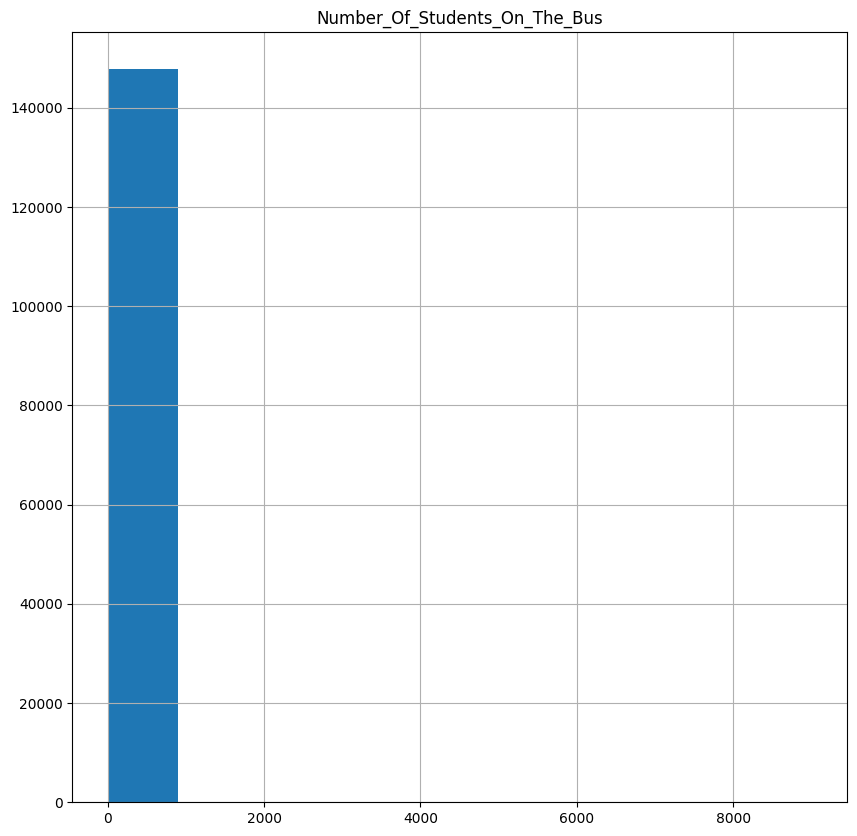

In [44]:
df.hist(figsize=(10, 10));

In [47]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, 'Number_Of_Students_On_The_Bus')

## Feature selection & Engneering

In [52]:
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['hour_Occurred_On'] = df['Occurred_On'].dt.hour
df['minute_Occurred_On'] = df['Occurred_On'].dt.minute

<ipython-input-52-652539f47d98>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-652539f47d98>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-652539f47d98>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df.drop(columns=['Has_Contractor_Notified_Parents', 'Has_Contractor_Notified_Schools', 'Occurred_On', 'Schools_Serviced' ], inplace=True)


# Split the Dataset


In [73]:
df.head()

,School_Year,Run_Type,Reason,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK,hour_Occurred_On,minute_Occurred_On
0,2015-2016,Pre-K/EI,Other,Bronx,"G.V.C., LTD.",5,No,Running Late,Pre-K,8,30
1,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",3,No,Running Late,Pre-K,7,10
5,2015-2016,Special Ed AM Run,Heavy Traffic,Bronx,ACME BUS CORP. (B2321),3,Yes,Running Late,School-Age,7,20
6,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",3,Yes,Running Late,Pre-K,8,9
7,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",4,No,Running Late,Pre-K,7,57


In [72]:
X = df.drop("Breakdown_or_Running_Late", axis=1)
y = df["Breakdown_or_Running_Late"].map({'Running Late':0 , 'Breakdown':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Encoding - Scalling

In [74]:
num_pip = make_pipeline(StandardScaler())
cat_pip_one_hot = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

pre_pip = ColumnTransformer([
    ('num_scalling', num_pip, ['Number_Of_Students_On_The_Bus' ]),
    ('cat_one_hot', cat_pip_one_hot, ['School_Year',  'Run_Type' , 'Reason', 'Boro', 'Bus_Company_Name', 'Have_You_Alerted_OPT', 'School_Age_or_PreK',
                                      'hour_Occurred_On', 'minute_Occurred_On']),
    ])

X_train = pre_pip.fit_transform(X_train)
X_test = pre_pip.transform(X_test)

# Impalance handling

In [67]:
count = df['Breakdown_or_Running_Late'].value_counts()

fig = px.bar(count, x=count.index, y='count', title='Distribution of Target', color_discrete_sequence=['#DD5050'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=count.index,
        ticktext=count.index
    )
)
fig.show()

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Model 1


In [76]:
model = Sequential()

model.add(Dense(32 , input_dim=X_train.shape[1], activation= 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



### Training the Model


In [79]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=50, shuffle=True, verbose=1)

Epoch 1/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9571 - loss: 0.1071 - val_accuracy: 0.9535 - val_loss: 0.1133
Epoch 2/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9598 - loss: 0.1006 - val_accuracy: 0.9552 - val_loss: 0.1125
Epoch 3/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9622 - loss: 0.0953 - val_accuracy: 0.9546 - val_loss: 0.1130
Epoch 4/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9613 - loss: 0.0987 - val_accuracy: 0.9535 - val_loss: 0.1210
Epoch 5/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9615 - loss: 0.0970 - val_accuracy: 0.9518 - val_loss: 0.1155
Epoch 6/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9623 - loss: 0.0936 - val_accuracy: 0.9534 - val_loss: 0.1205
Epoch 7/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9639 - loss: 0.0923 - val_accuracy: 0.9535 - val_loss: 0.1167
Epoch 8/30
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9641 - loss: 0.

### Evaluate the Model


In [80]:
model.evaluate(X_test, y_test)

877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9478 - loss: 0.1684


[0.17069649696350098, 0.9480084180831909]

In [81]:
model.evaluate(X_train, y_train)

3506/3506 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9743 - loss: 0.0649


[0.06494948267936707, 0.9747709035873413]

### Make Predictions


In [99]:
df.sample(10)

,School_Year,Run_Type,Reason,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK,hour_Occurred_On,minute_Occurred_On
6223,2015-2016,Special Ed AM Run,Heavy Traffic,Manhattan,LEESEL TRANSP CORP (B2192),4,No,Running Late,School-Age,7,41
1472,2015-2016,Special Ed AM Run,Heavy Traffic,Manhattan,HAPPY CHILD TRANS LLC (B2,1,No,Running Late,School-Age,7,44
144794,2016-2017,Special Ed AM Run,Won`t Start,Queens,"RELIANT TRANS, INC. (B232",0,Yes,Breakdown,School-Age,5,55
31567,2015-2016,Special Ed AM Run,Other,Brooklyn,"NEW DAWN TRANSIT, LLC (B2",0,No,Running Late,School-Age,6,30
135898,2016-2017,Special Ed AM Run,Other,Brooklyn,EMPIRE STATE BUS CORP.,4,No,Running Late,School-Age,7,0
115682,2016-2017,Special Ed AM Run,Flat Tire,Brooklyn,L & M BUS CORP. (B2192),0,No,Running Late,School-Age,6,16
25884,2015-2016,Pre-K/EI,Weather Conditions,Bronx,"G.V.C., LTD.",3,No,Running Late,Pre-K,8,39
65022,2016-2017,Special Ed PM Run,Flat Tire,Bronx,LITTLE RICHIE BUS SERVICE,0,No,Breakdown,School-Age,14,48
33664,2015-2016,Special Ed AM Run,Heavy Traffic,Manhattan,"RELIANT TRANS, INC. (B232",0,Yes,Running Late,School-Age,14,13
128653,2016-2017,Special Ed PM Run,Heavy Traffic,Queens,"RELIANT TRANS, INC. (B232",0,Yes,Running Late,School-Age,14,9


In [104]:
# # # if we want to predict real data:

# new_data = [['2015-2016', 'Special Ed AM Run' , 'Flat Tire', 'Queens', 'LEESEL TRANSP CORP (B2192)', 3, 'No', 'School-Age', 7, 30]]


# new_data_processed = pre_pip.transform(new_data)

# model.predict(new_data_processed)



### Model Performance Visualization


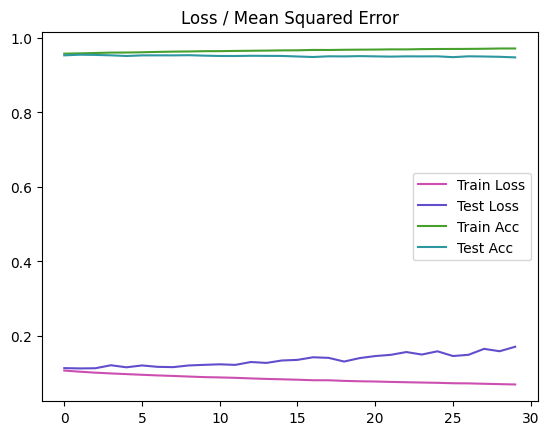

In [87]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='Train Loss', color='#cc4eb1')
plt.plot(history.history['val_loss'], label='Test Loss', color='#614ecc')
plt.plot(history.history['accuracy'], label='Train Acc', color='#47a02c')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='#2c97a0')
plt.legend()
plt.show()

### Save the Model


In [85]:
model.save('my_model.h5')

##  Model 2

In [90]:
model2 = Sequential()

model2.add(Dense(32 , input_dim=X_train.shape[1], activation= 'relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model2.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



### Training the Model


In [91]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=50, shuffle=True, verbose=1)

Epoch 1/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9259 - loss: 0.1873 - val_accuracy: 0.9520 - val_loss: 0.1225
Epoch 2/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9512 - loss: 0.1243 - val_accuracy: 0.9535 - val_loss: 0.1306
Epoch 3/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9539 - loss: 0.1178 - val_accuracy: 0.9515 - val_loss: 0.1213
Epoch 4/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9561 - loss: 0.1126 - val_accuracy: 0.9535 - val_loss: 0.1159
Epoch 5/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9572 - loss: 0.1111 - val_accuracy: 0.9546 - val_loss: 0.1125
Epoch 6/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9574 - loss: 0.1091 - val_accuracy: 0.9551 - val_loss: 0.1121
Epoch 7/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9600 - loss: 0.1036 - val_accuracy: 0.9523 - val_loss: 0.1151
Epoch 8/40
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9591 - loss: 0

### Evaluate the Model


In [92]:
model2.evaluate(X_test, y_test)

877/877 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9523 - loss: 0.1284


[0.12939466536045074, 0.9519666433334351]

In [93]:
model2.evaluate(X_train, y_train)

3506/3506 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9692 - loss: 0.0819


[0.08174515515565872, 0.9693506360054016]

### Make Predictions


### Model Performance Visualization


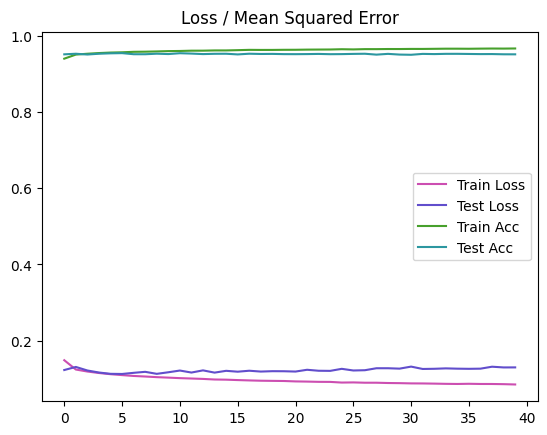

In [94]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='Train Loss', color='#cc4eb1')
plt.plot(history.history['val_loss'], label='Test Loss', color='#614ecc')
plt.plot(history.history['accuracy'], label='Train Acc', color='#47a02c')
plt.plot(history.history['val_accuracy'], label='Test Acc', color='#2c97a0')
plt.legend()
plt.show()

### Save the Model


In [95]:
model2.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?

- The data must be processed before it entered to the model, the model does not accept the categorical data type, so the encoding process converts the categorical data type to a numerical data type.


2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?

- In choosing the architecture step, you need to try different architectures until you achieve the accuracy you want, in this model architecture, I tried it and it showed good accuracy on the test set.


3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

- As mentioned above, you need to try different values ​​for those hyperparameters, and the choice of those hyperparameters affects the model's ability to learn well, may lead to overfitting problem, etc.


4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

- It is a binary classification task, so binary_crossentropy is the appropriate one.


5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.

- In model 1 the accuracy was good on the training and test sets but there was overfitting, so in model 2 I tried adding dropout and increaces the ecpochs to 40

6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
- Accuracy is the most relevant metric for classification tasks, with Model 1 producing a high accuracy of 94% on the test set.


7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
- they may reduced overfitting


8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
- In model 1 there was an overfitting in 3%, in model 2 I tried adding dropout and increaces the ecpochs to 40 and the overfitting decreaces to 1%